First few rows of the dataset:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Columns in the dataset:
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
  

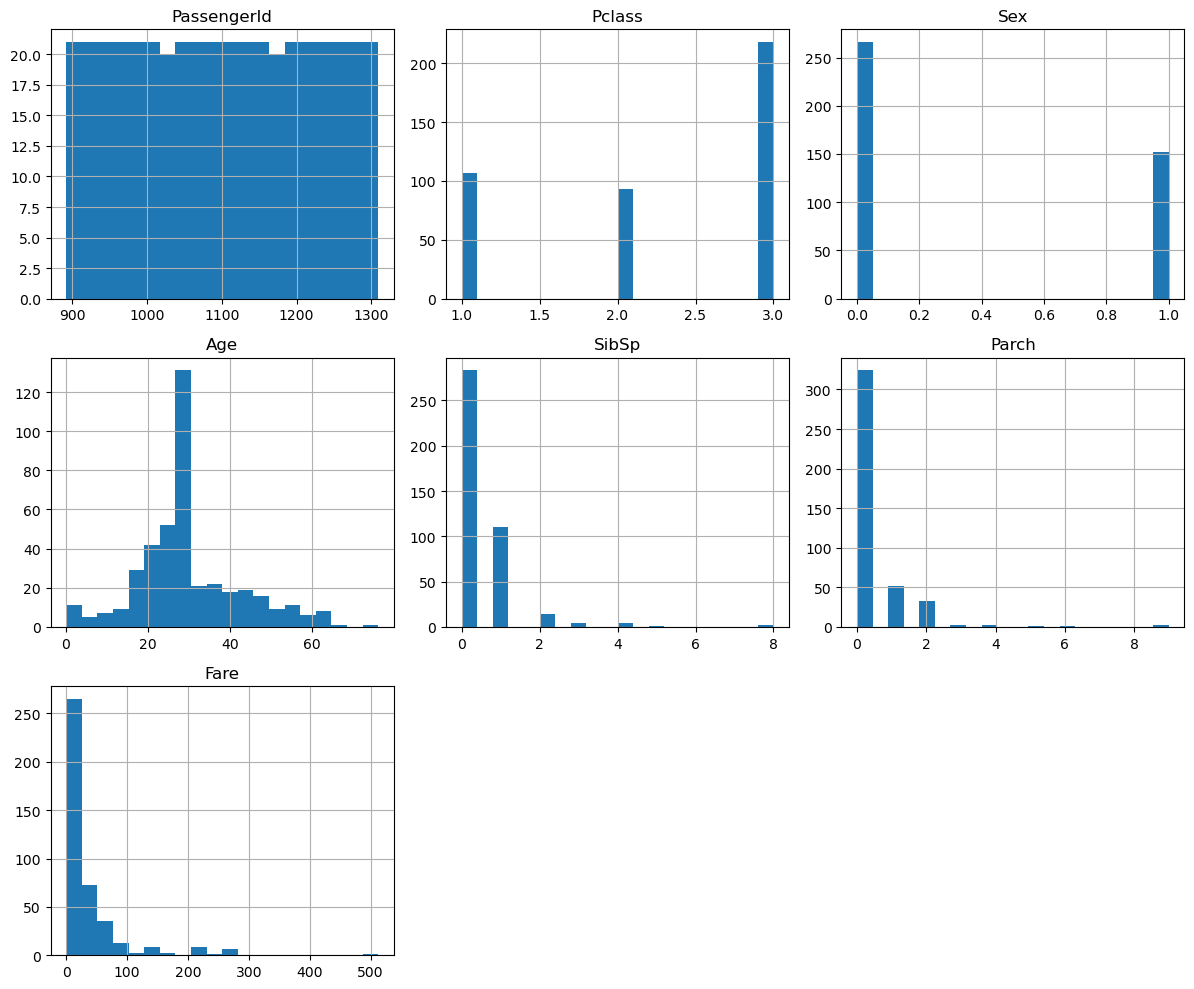


Plotting boxplots for Age and Fare by Pclass:


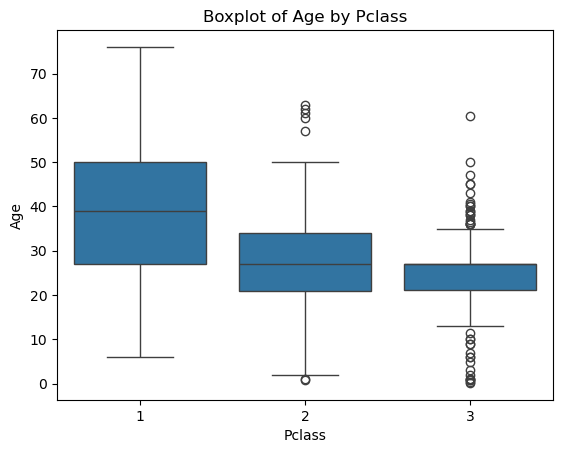

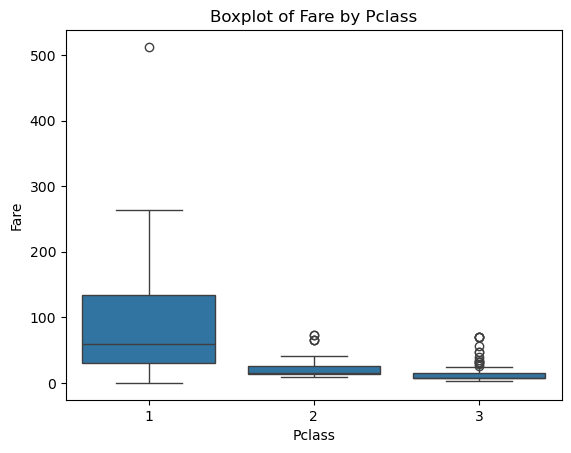


Check first few rows to confirm target column:
   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

    Age  SibSp  Parch   Ticket     Fare Cabin  Embarked_Q  Embarked_S  
0  34.5      0      0   330911   7.8292   NaN        True       False  
1  47.0      1      0   363272   7.0000   NaN       False        True  
2  62.0      0      0   240276   9.6875   NaN        True       False  
3  27.0      0      0   315154   8.6625   NaN       False        True  
4  22.0      1      1  3101298  12.2875   NaN       False        True  

Error: The column 'Survived' does not exist. Please chec

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier
import xgboost as xgb

# Load the Titanic dataset from CSV
file_path = r"C:\Users\User\Downloads\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check the column names of the dataset
print("\nColumns in the dataset:")
print(df.columns)

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Impute missing values for Age and Embarked columns
df['Age'] = df['Age'].fillna(df['Age'].median())  # Impute missing Age with median
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Impute missing Embarked with mode

# Encode 'Sex' column (0 for male, 1 for female)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' column (dropping the first category to avoid collinearity)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Explore data distributions using histograms and box plots
print("\nPlotting histograms for numerical columns:")
df.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots for Age and Fare based on Pclass
print("\nPlotting boxplots for Age and Fare by Pclass:")
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Boxplot of Age by Pclass')
plt.show()

sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Boxplot of Fare by Pclass')
plt.show()

# Ensure you have the correct column name for the target variable
# Print the first few rows to check if 'Survived' or another column is present
print("\nCheck first few rows to confirm target column:")
print(df.head())

# If the target column name is something different (e.g., 'Survival'), modify the next line accordingly
# Assuming target column is 'Survived' or something similar, adjust this line:
target_column = 'Survived'  # Replace with correct column name if needed
if target_column not in df.columns:
    print(f"\nError: The column '{target_column}' does not exist. Please check the column names.")
else:
    # Split the dataset into features (X) and target (y)
    X = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)  # Drop non-features
    y = df[target_column]  # Set target column (e.g., 'Survived')

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize LightGBM and XGBoost models
    lgbm = LGBMClassifier()
    xgbm = xgb.XGBClassifier()

    # Train the models
    lgbm.fit(X_train, y_train)
    xgbm.fit(X_train, y_train)

    # Make predictions using both models
    lgbm_pred = lgbm.predict(X_test)
    xgbm_pred = xgbm.predict(X_test)

    # Evaluate models using accuracy, precision, recall, and F1-score
    lgbm_acc = accuracy_score(y_test, lgbm_pred)
    xgbm_acc = accuracy_score(y_test, xgbm_pred)

    lgbm_prec = precision_score(y_test, lgbm_pred)
    xgbm_prec = precision_score(y_test, xgbm_pred)

    lgbm_rec = recall_score(y_test, lgbm_pred)
    xgbm_rec = recall_score(y_test, xgbm_pred)

    lgbm_f1 = f1_score(y_test, lgbm_pred)
    xgbm_f1 = f1_score(y_test, xgbm_pred)

    # Print evaluation metrics
    print("\nModel Evaluation Results:")
    print(f"LGBM - Accuracy: {lgbm_acc}, Precision: {lgbm_prec}, Recall: {lgbm_rec}, F1: {lgbm_f1}")
    print(f"XGBM - Accuracy: {xgbm_acc}, Precision: {xgbm_prec}, Recall: {xgbm_rec}, F1: {xgbm_f1}")

    # Comparative Analysis: Visualize model performance comparison
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
    lgbm_scores = [lgbm_acc, lgbm_prec, lgbm_rec, lgbm_f1]
    xgbm_scores = [xgbm_acc, xgbm_prec, xgbm_rec, xgbm_f1]

    # Plot comparison of metrics
    x = range(len(metrics))
    plt.bar(x, lgbm_scores, width=0.4, label='LightGBM', align='center')
    plt.bar(x, xgbm_scores, width=0.4, label='XGBoost', align='edge')

    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title('Model Performance Comparison')
    plt.xticks(x, metrics)
    plt.legend()
    plt.show()
